In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
date_range = pd.date_range(start='2019-10-1', end='2020-06-01', freq='MS')
date_range

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [3]:
data = pd.DataFrame({
    'Date' : date_range,
    'Col_1': [34, 43, 14, 15,
              15, 14, 31, 25, 62],
    'Col_2': [52, 66, 78, 15, 15,
              5, 25, 25, 86],
    'Col_3': [13, 73, 82, 58, 52,
              87, 26, 5, 56],
    'Col_4': [44, 75, 26, 15, 15,
              14, 54, 25, 24]
})
data

,Date,Col_1,Col_2,Col_3,Col_4
0,2019-10-01,34,52,13,44
1,2019-11-01,43,66,73,75
2,2019-12-01,14,78,82,26
3,2020-01-01,15,15,58,15
4,2020-02-01,15,15,52,15
5,2020-03-01,14,5,87,14
6,2020-04-01,31,25,26,54
7,2020-05-01,25,25,5,25
8,2020-06-01,62,86,56,24


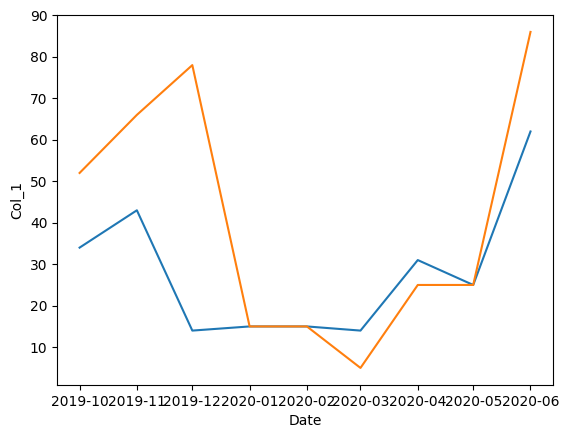

In [4]:
sns.lineplot(x='Date', y='Col_1', data=data)
sns.lineplot(x='Date', y='Col_2', data=data)
plt.show()

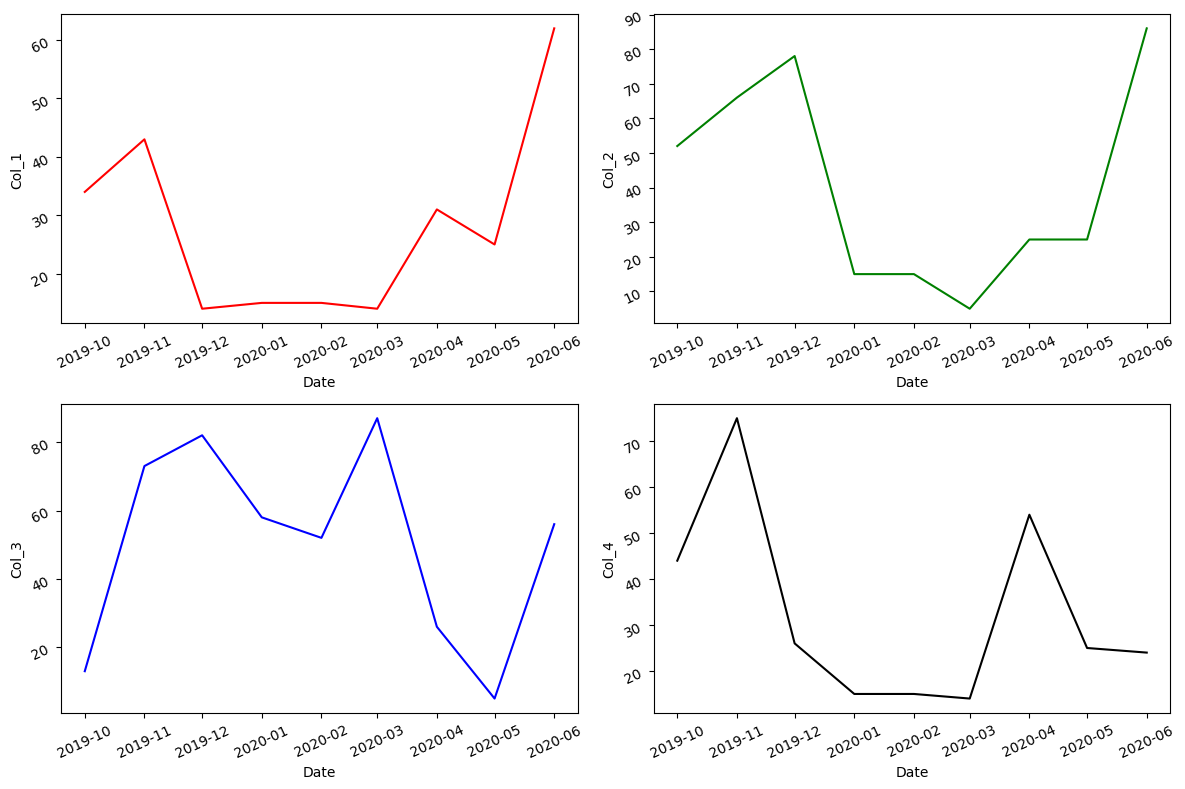

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

sns.lineplot(x='Date', y='Col_1', data=data, ax=ax[0][0], color='r')
ax[0][0].tick_params(labelrotation=25)

sns.lineplot(x='Date', y='Col_2', data=data, ax=ax[0][1], color='g')
ax[0][1].tick_params(labelrotation=25)

sns.lineplot(x='Date', y='Col_3', data=data, ax=ax[1][0], color='b')
ax[1][0].tick_params(labelrotation=25)

sns.lineplot(x='Date', y='Col_4', data= data, ax=ax[1][1], color='k')
ax[1][1].tick_params(labelrotation=25)
fig.tight_layout()

In [6]:
# daily female born in 1959-01-01 to 1959-12-01
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


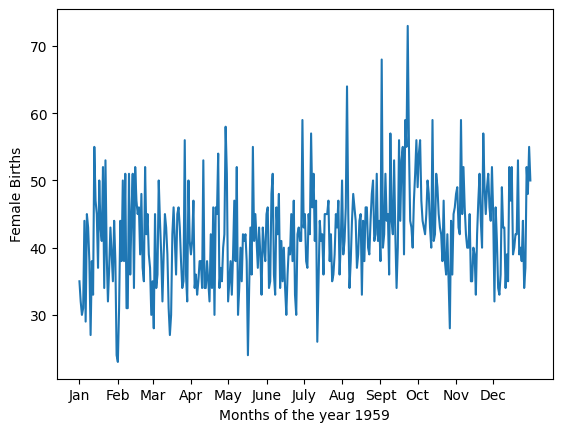

In [7]:
sns.lineplot(x='Date', y='Births', data=df)

plt.xlabel('Months of the year 1959')
pos = [ '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01', 
       '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
       '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01']
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
       'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(pos, lab)
plt.ylabel('Female Births')
plt.show()

We can notice that it is very difficult to gain knowledge from the above plot as the data fluctuates a lot. So, let us plot it again but using the Rolling Average concept this time.

In [8]:
df['rolling_avg'] = df['Births'].rolling(7).mean()
df.head(10)

,Date,Births,rolling_avg
0,1959-01-01,35,NaN
1,1959-01-02,32,NaN
2,1959-01-03,30,NaN
3,1959-01-04,31,NaN
4,1959-01-05,44,NaN
5,1959-01-06,29,NaN
6,1959-01-07,45,35.142857
7,1959-01-08,43,36.285714
8,1959-01-09,38,37.142857
9,1959-01-10,27,36.714286


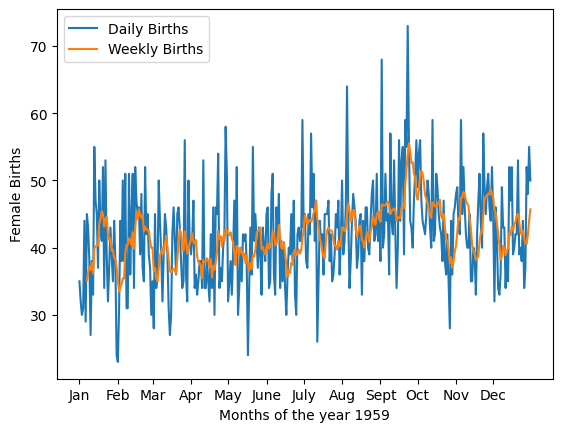

In [9]:
plt.xlabel('Months of the year 1959')
plt.ylabel('Female Births')

sns.lineplot(x='Date', y='Births', data=df, label='Daily Births')
sns.lineplot(x='Date', y='rolling_avg', data=df, label='Weekly Births')
plt.xticks(pos, lab)
plt.legend()
plt.show()